here1


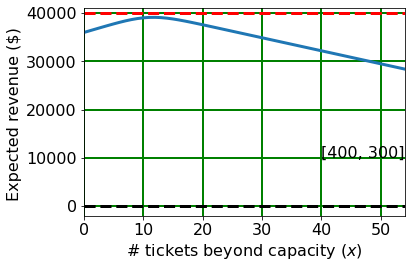

In [1]:
def CalculateOverbooking (revenue_per_ticket,cost_per_voucher):
    import numpy as np
    import math
    import matplotlib.pyplot as plt
    from scipy.stats import norm



#plt.style.use('bmh')


    plt.rc('lines', linewidth=3)
    plt.rc('font', size=16)

    # revenue we make from each ticket sold ($)
#    revenue_per_ticket = 100
    # cost of a voucher ($)
 #   cost_per_voucher = 675

    # probability any given passenger who bought a ticket will show up for his/her flight
    p = 0.9

    # total number of seats on the airplane.
    nb_total_seats = 100

    # Goal: find expected net revenue per flight as a function of `x`, the number of tickets sold beyond capaacity.
    #    i.e. we are selling `nb_total_seats` + `x` tickets.
    #   net revenue = (revenue from tickets) - (cost of voucher payoffs to overbook customers)
    #  We will find net revenue for `x` = 0, 1, 2, ..., N_x
    #  (Note we only consider `x` >= 0 b/c we at least sell a ticket for each seat!)
    N_x = 55

    # pre-allocate here. net_revenue[i] := net revenue for x = i.
    expected_net_revenue = np.zeros((N_x,))

    ## expected net revenue as a function of x
    for x in range(N_x):
        # mean and variance in binomial distribution for this $x$.
        # e.g. mean is referring to the # of customers we expect to show up given we sold (nb_total_seats+x) tickets
        mean = (nb_total_seats + x) * p
        sig2 = (nb_total_seats + x) * p * (1 - p)

        # pre-allocate expected voucher payoffs and ticket revenue we expect for this `x`
        expected_voucher_payoffs = 0.0
        expected_ticket_revenue = 0.0

        # consider the probability that $k$ customers show up to the flight
        # anywhere from 0, 1, 2, ..., nb_total_seats+x customers could show up
        #    ... since we sold nb_total_seats+x tickets!
        for k in range(nb_total_seats + x + 1):
            # to calculate Pr(N=k| x), governed by binomial dist'n, use normal approximation to binomial
            # let Z ~ Normal(0, 1)
            #   Pr(N=k|x) ~ Prob(l < Z < h)
            #   subtract cumulative distribution (cdf) functions for this
            h = (k + 0.5 - mean) / math.sqrt(sig2)  # -0.5 is for continuity correction
            l = (k - 0.5 - mean) / math.sqrt(sig2)
            prob_k_show_up = norm.cdf(h) - norm.cdf(l)

            # calculate ticket revenue given `k` customers show up
            ticket_revenue = revenue_per_ticket * np.min([nb_total_seats, k])

            expected_ticket_revenue += prob_k_show_up * ticket_revenue

            # calculate voucher payoffs
            voucher_payoffs = cost_per_voucher * np.max([0, k - nb_total_seats])

            expected_voucher_payoffs += prob_k_show_up * voucher_payoffs
        expected_net_revenue[x] = expected_ticket_revenue - expected_voucher_payoffs

    # plot expected net revenue as a function of `x`


    fig = plt.figure()
    print ("here1")

    plt.plot(range(N_x), expected_net_revenue, linewidth=3)
    plt.xlim([0, x])
    plt.axhline(y=0, linestyle='--', color='k')
    plt.axhline(y=nb_total_seats * revenue_per_ticket, linestyle='--', color='r')
    plt.xlabel('# tickets beyond capacity ($x$)')
    plt.ylabel('Expected revenue (\$) ')
    plt.text(40,10000,[revenue_per_ticket,cost_per_voucher],fontdict=None) #('Revenue per Ticket:','Cost per Voucher'),loc='upper center', shadow=True)
    plt.grid(color='g', linestyle='-', linewidth=2)
#revenue_per_ticket cost_per_voucher
    plt.tight_layout()
    plt.savefig('overbook.png', format='png')
    plt.show()

CalculateOverbooking(400, 300)